In [ ]:
# Imports
import torch
from torch import nn  # All neural network modules
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch.utils.data import Dataset, DataLoader  # Gives easier dataset managment
import torchvision
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation


# **Steps**

    Step 1: Load Dataset
    Step 2: Make Dataset Iterable
    Step 3: Create Model Class
    Step 4: Instantiate Model Class
    Step 5: Instantiate Loss Class
    Step 6: Instantiate Optimizer Class
    Step 7: Train Model


## **Load Dataset**


In [ ]:
#The MNIST dataset contains black and white, hand-written (numerical) digits that are 28x28 pixels large. 
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
# root is the path where the train/test data is stored,
#train specifies training or test dataset,
#download=True downloads the data from the internet if it’s not available at root.
#transform specify the feature and label transformations

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [ ]:
print(len(train_dataset)) 
print(len(test_dataset)) 

60000
10000


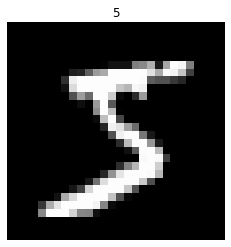

In [ ]:
import matplotlib.pyplot as plt

img, label = train_dataset[0]
plt.title('{}'.format(label))
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# **Make dataset iterable**

Because we have 60000 training samples (images), we need to split them up to small groups (batches) and pass these batches of samples to our feedforward neural network subsesquently.

There are a few reasons why we split them into batches. Passing your whole dataset as a single batch would:

(1) require a lot of RAM on your CPU/GPU and this might result in Out-of-Memory (OOM) errors.

(2) cause unstable training if you just use all the errors accumulated in 60,000 images to update the model rather than gradually update the model. 

If we have 60,000 images and we want a batch size of 100, then we would have 600 iterations where each iteration involves passing 600 images to the model and getting their respective predictions.

An epoch means that you have successfully passed the whole training set, 60,000 images, to the model. Continuing our example above, an epoch consists of 600 iterations.

If we want to go through the whole dataset 5 times (5 epochs) for the model to learn, then we need 3000 iterations (600 x 5)

In [ ]:
batch = 60000 / 100
print(batch)
ep = 600 * 5
print(ep)

600.0
3000


In [ ]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# **A simple Linear Model**

In [ ]:
example_model = nn.Linear(50, 1) 

# The example_model object contains weights and biases of the model. By default, PyTorch initializes these values to a random number close to 0

weight, bias = list(example_model.parameters()) 

# These values should be different from above
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[ 0.1197,  0.1199, -0.0340, -0.0781, -0.0638, -0.1044,  0.1107, -0.1034,
          0.1196, -0.1398, -0.1275,  0.0299, -0.0958,  0.1231,  0.0253, -0.0769,
          0.0807, -0.0622,  0.0062,  0.0871,  0.1185,  0.0316, -0.1055, -0.0340,
          0.1176,  0.0589, -0.1123,  0.0517, -0.1336,  0.0507,  0.0461, -0.1180,
         -0.1077, -0.0562, -0.0414, -0.0381, -0.0783,  0.0602, -0.0654,  0.0927,
          0.1257,  0.0866, -0.0099,  0.1111, -0.1408, -0.1342, -0.0860, -0.0814,
         -0.0606, -0.0654]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([-0.1129], requires_grad=True)
torch.Size([1])


# **Create Model Class**

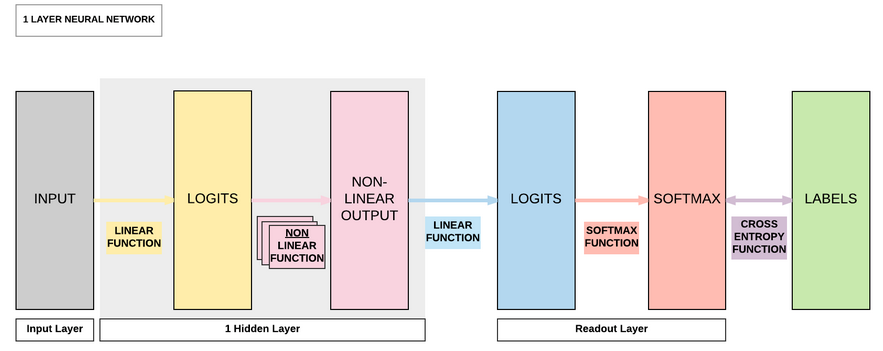

In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

# **Instantiate model class**
Input dimension: 784

Size of image: 28 x 28 =784

Output dimension: 10

0, 1, 2, 3, 4, 5, 6, 7, 8, 9

Hidden dimension: 100 (Can be any number)

Similar term:

Number of neurons / Number of non-linear activation functions



In [ ]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

In [ ]:
# instantiate loss class

criterion = nn.CrossEntropyLoss()

# **Instantiate optimizer class**
Simplified equation:

    θ = θ - η × ∇θ

θ: parameters (our tensors with gradient accumulation capabilities)

η: learning rate (how fast we want to learn)

∇θ: parameters' gradients

Even simplier equation:

    parameters = parameters - learning_rate * parameters_gradients
    At every iteration, we update our model's parameters



In [ ]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# model parameters
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

<generator object Module.parameters at 0x7fe1c271fac0>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


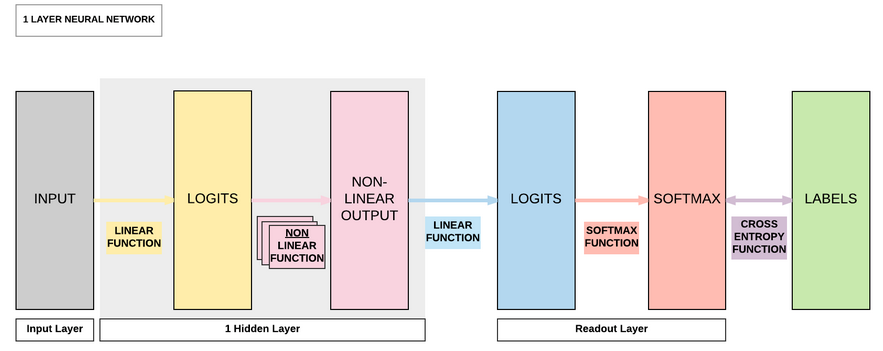

# **Train Model**

    Process
        1. Convert inputs to tensors with gradient accumulation capabilities
        2. Clear gradient buffers
        3. Get output given inputs
        4. Get loss
        5. Get gradients w.r.t. parameters
        6. Update parameters using gradients
            parameters = parameters - learning_rate * parameters_gradients
        7. REPEAT

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6072381734848022. Accuracy: 86.25
Iteration: 1000. Loss: 0.3938537538051605. Accuracy: 89.6500015258789
Iteration: 1500. Loss: 0.25452321767807007. Accuracy: 90.5999984741211
Iteration: 2000. Loss: 0.5062181949615479. Accuracy: 91.30999755859375
Iteration: 2500. Loss: 0.28994256258010864. Accuracy: 91.62000274658203
Iteration: 3000. Loss: 0.4172280430793762. Accuracy: 92.08000183105469


# **Create Model Class using tanh function**

In [ ]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.4688204228878021. Accuracy: 91.47000122070312
Iteration: 1000. Loss: 0.18852651119232178. Accuracy: 92.37000274658203
Iteration: 1500. Loss: 0.2350984364748001. Accuracy: 93.55999755859375
Iteration: 2000. Loss: 0.10043757408857346. Accuracy: 94.16000366210938
Iteration: 2500. Loss: 0.1817885786294937. Accuracy: 94.61000061035156
Iteration: 3000. Loss: 0.1064949780702591. Accuracy: 95.08999633789062


# 2 Hidden Layer Feedforward Neural Network (ReLU Activation) with gpu

Change runtime type to GPU


In [ ]:
# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

In [ ]:
'''
CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)
        return out

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
model.to(device)
'''
INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
total_size = len(train_loader)
print(total_size)
# Train the model
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader,0):
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t parameters
        optimizer.zero_grad()
        
        # Forward pass to get ouputs/logits
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs,labels)
        
        # Getting gradients w.r.t parameters        
        loss.backward()

        # Updating parameters
        optimizer.step()
        
        if (i+1)%500==0:
            print("Epoch {}/{} : Loss {:.4f}".format(epoch+1,num_epochs,loss))

600
Epoch 1/5 : Loss 0.3209
Epoch 2/5 : Loss 0.2861
Epoch 3/5 : Loss 0.3514
Epoch 4/5 : Loss 0.0818
Epoch 5/5 : Loss 0.0655
600
Epoch 1/5 : Loss 0.1825
Epoch 2/5 : Loss 0.0457
Epoch 3/5 : Loss 0.0598
Epoch 4/5 : Loss 0.0804
Epoch 5/5 : Loss 0.0420


In [ ]:
# test the model
with torch.no_grad():
    correct = 0.0
    total = 0.0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        outputs = model(images)
        _,prediction = torch.max(outputs,1)
        total += labels.size(0)
        correct += (prediction==labels).sum()
    print("Accuracy : {:.2f}".format((correct*100.0)/total))

Accuracy : 97.59


# **Summary:**

Feedforward Neural Network Models

    Model: 1 hidden layer (sigmoid activation)
    Model: 1 hidden layer (tanh activation)
    Model: 2 hidden layers (ReLU activation) with GPU

Models Variation in Code

    Modifying only step 3



## For more details visit, (https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

# Activity:
  
    Use CIFAR-10 dataset and build a model with 5 hidden layers and activation as relu